<a href="https://colab.research.google.com/github/daveveed/Machine-Learning/blob/main/CNN_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## classifcation

dataset of 60,000 28 by 28 gray scal images of 10 fashion categories

with a test set of 10,000 images

class labels 

|Label | Description|
| --- |---|
| 0 | T-Shirt|
| 1 |Trouser|
| 2 | Pullover|
| 3 | Dress|
| 4 | Coat|
| 5 | sandal|
| 6 | Shirt|
| 7 | Sneaker|
| 8 | Bag|
| 9 | Ankle boot|


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# data reshape

# in ANN we used the flatten method
# in CNN we need 3D array as input and another dimension for channels

X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [6]:
# data normalisation

X_train_n = X_train_full/255
X_test_n = X_test / 255

In [7]:
# split into training testing and validation datasets

In [8]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [9]:
# setting random seed to obtain the same result
np.random.seed(1)
tf.random.set_seed(1)

## model structure
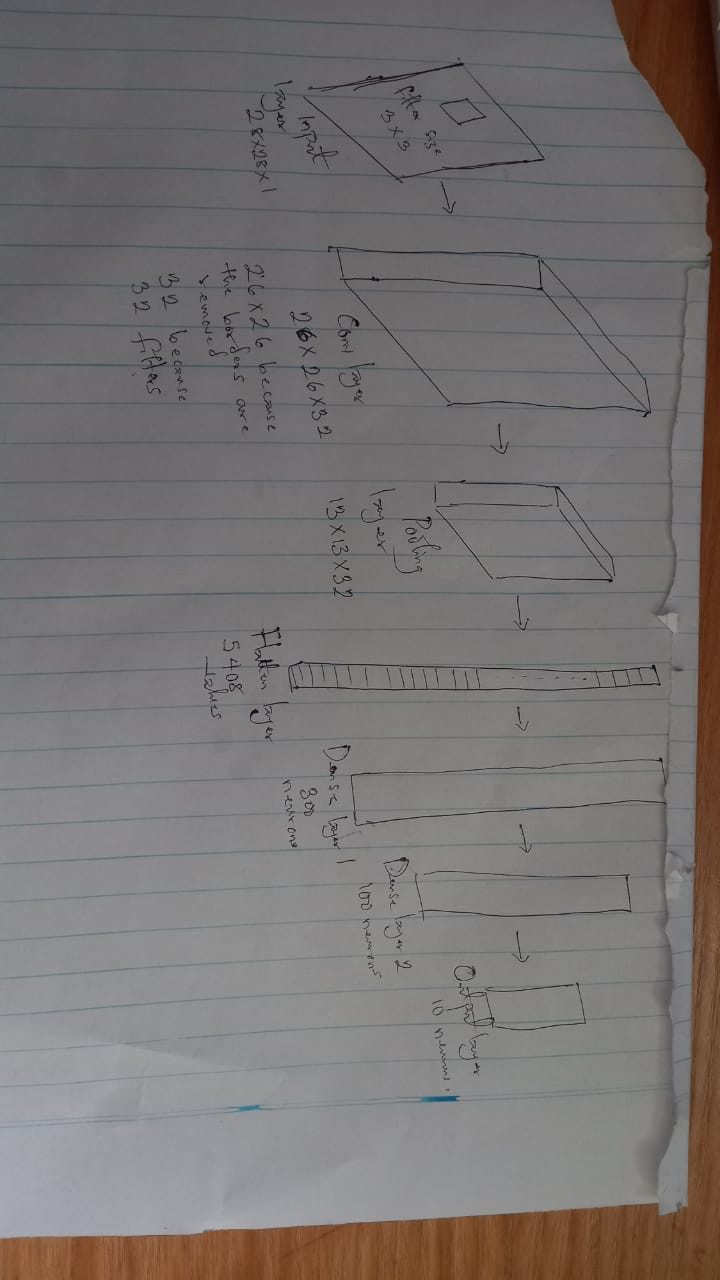

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, 
                              kernel_size=(3,3), strides=1, padding='valid', 
                              activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics= ['accuracy'])

In [13]:
model_history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                          validation_data= (X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 59s 68ms/step - loss: 0.8685 - accuracy: 0.7131 - val_loss: 0.6057 - val_accuracy: 0.7854
Epoch 2/10
860/860 [==============================] - 44s 51ms/step - loss: 0.5346 - accuracy: 0.8071 - val_loss: 0.5562 - val_accuracy: 0.7990
Epoch 3/10
860/860 [==============================] - 44s 51ms/step - loss: 0.4772 - accuracy: 0.8292 - val_loss: 0.4567 - val_accuracy: 0.8414
Epoch 4/10
860/860 [==============================] - 44s 51ms/step - loss: 0.4399 - accuracy: 0.8423 - val_loss: 0.4043 - val_accuracy: 0.8590
Epoch 5/10
860/860 [==============================] - 42s 49ms/step - loss: 0.4171 - accuracy: 0.8501 - val_loss: 0.4223 - val_accuracy: 0.8514
Epoch 6/10
860/860 [==============================] - 51s 60ms/step - loss: 0.3959 - accuracy: 0.8578 - val_loss: 0.3660 - val_accuracy: 0.8722
Epoch 7/10
860/860 [==============================] - 81s 94ms/step - loss: 0.3774 - accuracy: 0.8646 - val_loss: 0.4235 - val_accuracy:

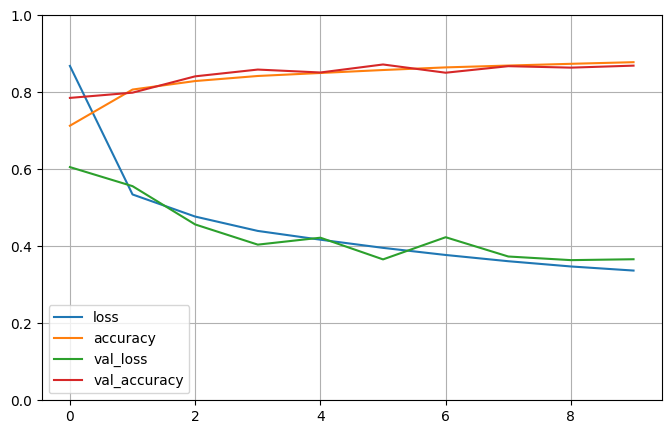

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3941 - accuracy: 0.8582


In [16]:
ev

[0.39406058192253113, 0.8582000136375427]

In [17]:
# since we dont have new dataset to test we use the first 3 data for testing
X_new = X_test[:3]

In [20]:
y_pred = model.predict(X_new)
y_pred.round(3)

1/1 [==============================] - 0s 133ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.032, 0.   , 0.567, 0.013,
        0.388],
       [0.001, 0.   , 0.914, 0.   , 0.021, 0.   , 0.064, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [21]:
classes = np.argmax(y_pred,axis=1)
classes

array([7, 2, 1])

In [22]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

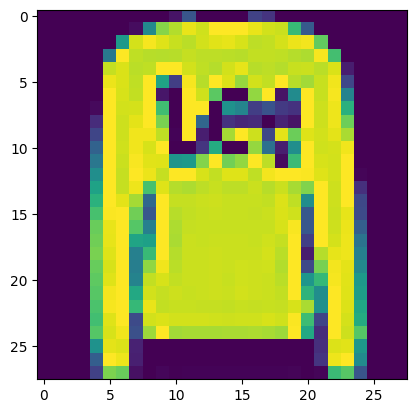

In [25]:
plt.imshow(X_test[1].reshape((28,28)))